# COGS 108 - Final Project 

# Overview

*Fill in your overview here*
## <font color='red'> TODO </font>


# Names

- Jaidev Mirchandani
- Bora Mutluoglu
- Yuqi Zhang
- Keven Wilbert Saputra
- Weiqi Peng

# Group Members IDs

- A92092333
- A13458532
- A15155513
- A14772056
- A14416515

# Research Question

Which of the following factors from median age of house, total rooms, total bedrooms, households and median income plays the most significant role in affecting the prices of houses in California? <br>

## <font color='red'> TODO </font>


## Background and Prior Work

Over the years, the median housing prices in the US has risen quite significantly in which, according to census gov website, home values increase approximately $10000 every decade from 1940 to 2000. This trend shows a concerning issue as more graduates are searching for an affordable home. Therefore, as a group of students who is currently studying at the University of California, San diego, we are determined to create a Data Science project on what factor plays the most significant role in the affected housing prices.

We are curious about this topic because there are a lot of factors that are important to the rising price of housing in the state. Several of these factors include the housing median age, total rooms, total bedrooms, population in the district, households in the district and median income of the population. Moreover, this knowledge helps us when we make the transition from college life to the real world. Since many of our team members are engineering majors, we are more inclined to look for housing in areas where there are ample opportunities for our future careers. Areas that are generally popular for careers in engineering seemingly coincide with very high housing prices, this is concerning for us because being college students we want to be able to live somewhere affordable after we graduate. One such place in California is the Bay Area, as people swarm into the area to find work in the tech industry the options for housing diminish which cause the prices of the available options increase. In effect, the San Francisco Bay Area has become a place where the average rent is the highest in the country.


References (include links):
- 1) https://www.census.gov/hhes/www/housing/census/historic/values.html
- 2) https://scotscoop.com/college-graduates-struggle-to-find-affordable-bay-area-housing/


# Hypothesis



We predict that the median income is the factor that has the greatest effect on house prices in California. This is because higher disposable income leads to an increase in the demand for long-term investments such as housing, which eventually drives house prices up in the future years.

## <font color='red'> TODO </font>


# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name: California Housing Dataset
- Link to the dataset: https://www.kaggle.com/harrywang/housing#housing.csv
- Number of observations: This dataset contains 20,600 rows and 10 columns. 

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

## <font color='red'> TODO </font>

# Setup

## <font color='red'>Todo: Here is a description that briefly describes what tools/apis we applied in this project.</font>

In [1]:
## Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import patsy
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set()


# Data Wrangling&Cleaning


## <font color='red'> TODO: Might add some description here as opening </font>

In [2]:
# load in dataset in the format of csv using pandas read_csv method
data_path = './input/housing.csv'
df_housing = pd.read_csv(data_path)
# inpect the topc rows
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Inspect the basic information
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Value types and Categorical Value:
By inspecting the basic information above, we have a sense that most properties are in the form of float value, while there is one categorical property 'ocean_proximity'. We just remember that we need to somehow handle the categorical value later in the data analysis part.

#### No duplicate properties and observations:
Through the top rows and basic informations, we are pretty sure that there is no duplication properties or observations. For now, we cannot really tell which column is irrelevant to the 'median_house_price', and we will also get into that in the data analysis part.

#### Potential NaN values:
We also notice that the total_berooms property has in total 20433 entries, while all other properties have 20640 entires. This probably suggests the existence of null value. In order to further analyze the data, we need to drop the rows that contain those Nan values.

In [4]:
# Further check the existence of Nan value
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Yes! As we assumed above, there are many nan values of 'total_bedrooms'. We will drop those rows:

In [5]:
# drop the null values
df_housing.dropna(inplace=True)

# then check the null values again
df_housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Check data distribution
Now our data is clean enough to be used for the model. However, we want to futher investigate the distributions of the values. We don't expect all the values to be normally distributed, since properties like 'total_rooms', 'household' might have multimodal distributions that caused by the district discrepancies. Yet we don't want some outliers to affect our visualizations and analysis.

In [6]:
# inpect the statistics
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


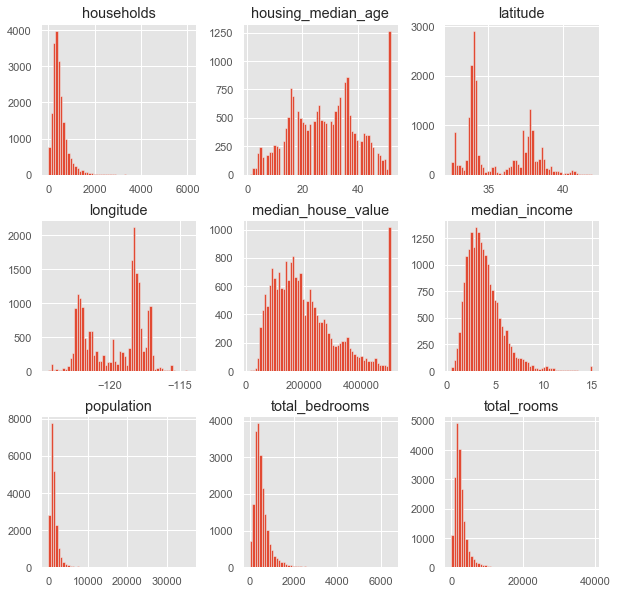

In [7]:
# Let's see the distributions of all elements
# We set the barplot color red in comparison to the one with removed outliers later
with plt.style.context('ggplot'):
    df_housing.hist(bins=60, figsize=(10,10))

#### Remove outliers
We see taht the distributions are all kind of reasonable. But some distributions skewed to the right too much that we suspect there are outliers in those values. 

Let's do a Z-score test to detect the outliers: <br>As mentioned in lecture, z-score is the number of standard deviation that goes above our below the mean value of the data. Here we use the scipy z-score method to check outliers:

In [8]:
# Notice that when measuing the z-scores, we have to avoid the ocean_proximity columns since it's a categorical value
z = np.abs(stats.zscore(df_housing.drop('ocean_proximity',axis=1)))
z

array([[1.32731375, 1.05171726, 0.98216331, ..., 0.97683327, 2.34516291,
        2.12881864],
       [1.32232256, 1.04235526, 0.60621017, ..., 1.67037262, 2.33263161,
        1.31362603],
       [1.33230494, 1.03767426, 1.85576873, ..., 0.84342665, 1.78293943,
        1.25818254],
       ...,
       [0.82320322, 1.77727236, 0.92388486, ..., 0.17377773, 1.14317103,
        0.99247676],
       [0.87311515, 1.77727236, 0.84446619, ..., 0.39350628, 1.05513604,
        1.05831591],
       [0.83318561, 1.74918635, 1.00330353, ..., 0.07995643, 0.78060586,
        1.01759959]])


Let's set the threshold for z-score as 3, which pretty much covers more than 99% of the data, and should work well for our purpose:

In [9]:
threshold = 3
print(np.where(z>threshold))

(array([   95,    95,   104, ..., 20422, 20422, 20422]), array([4, 6, 4, ..., 4, 5, 6]))


The first array above represents the row numbers, while the second array represents the columns numbers.<br>
We will drop those outliers by rows:


In [10]:
# Note: Please do not run this cell multiple times
df_housing = df_housing[(z<3).all(axis=1)]
print('dataframe shape:{}'.format(df_housing.shape))
print('we dropped {} rows as outliers'.format(20640-df_housing.shape[0]))

dataframe shape:(19549, 10)
we dropped 1091 rows as outliers


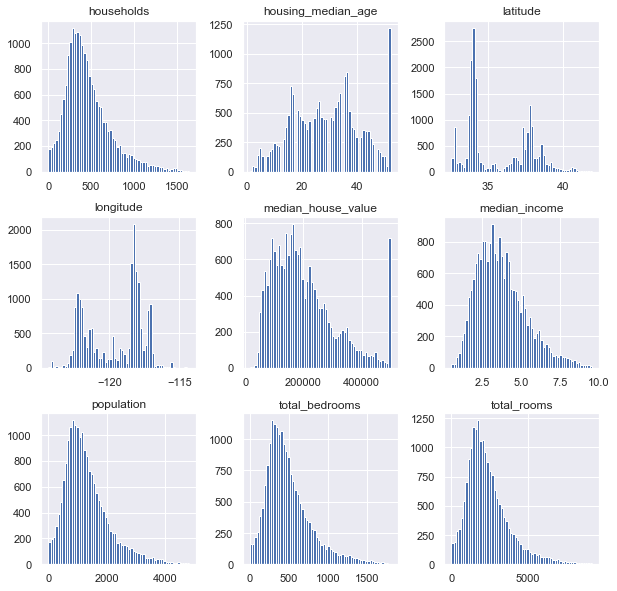

In [11]:
# Let's see the distributions withough outliers again
df_housing.hist(bins=60, figsize=(10,10));

Much better, isn't it?<br>
For now, our data seems clean, organized and good to go! Let's move on to the data analysis part.

# Data Analysis & Visualizations

## <font color='red'> TODO: Add a description/opening for our data analysis part ➡️</font>

In our hypothesis, we proposed that median income would have a strong effect on the median house prices, while some other properties might be trivial. <br>

### Data Relationship
Correlation is an important measurement of relationship between values. <br> It would be clear for us to first list out the correlations between all variables:

In [12]:
# display the correlation matrix
corr_mtx = df_housing.corr()
corr_mtx

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924393,-0.100141,0.009092,0.045233,0.105016,0.035920,-0.015395,-0.045238
latitude,-0.924393,1.000000,0.001938,-0.009874,-0.055443,-0.127409,-0.067159,-0.082416,-0.146941
housing_median_age,-0.100141,0.001938,1.000000,-0.347292,-0.287559,-0.261842,-0.263713,-0.138965,0.118150
total_rooms,0.009092,-0.009874,-0.347292,1.000000,0.901207,0.798477,0.891989,0.257774,0.170497
total_bedrooms,0.045233,-0.055443,-0.287559,0.901207,1.000000,0.842435,0.973819,-0.019651,0.075741
population,0.105016,-0.127409,-0.261842,0.798477,0.842435,1.000000,0.879800,-0.007134,-0.034930
households,0.035920,-0.067159,-0.263713,0.891989,0.973819,0.879800,1.000000,0.013894,0.094479
median_income,-0.015395,-0.082416,-0.138965,0.257774,-0.019651,-0.007134,0.013894,1.000000,0.657102
median_house_value,-0.045238,-0.146941,0.118150,0.170497,0.075741,-0.034930,0.094479,0.657102,1.000000


An even more visualized way to show correlations is a heat map:

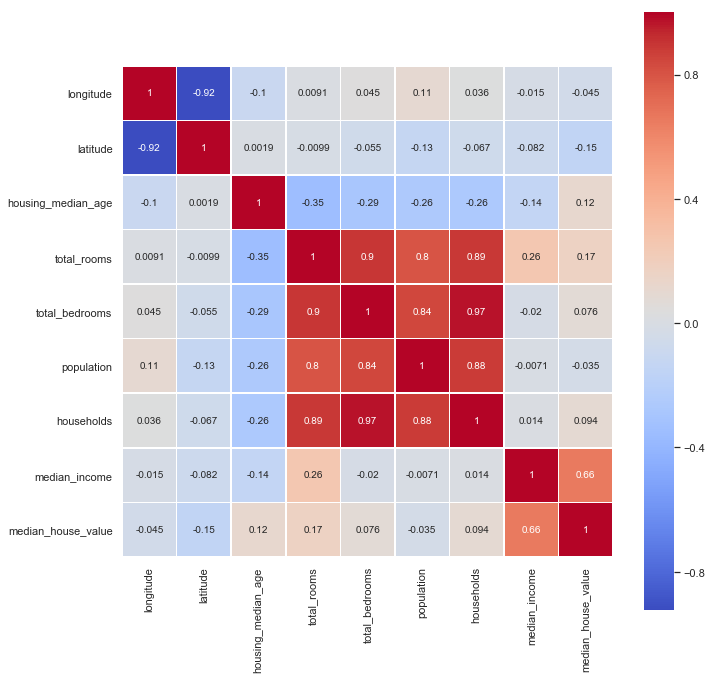

In [13]:
# Visualize the correlation between elements with a heatmap
plt.figure(figsize=(11,11))
hm=sns.heatmap(annot=True, square=True,data=df_housing.corr(),linewidths=0.5,cmap='coolwarm')
plt.show()

We see some high correlations between 'households' and 'population', 'household' and 'total_rooms', 'total_rooms' and 'populations'. Those actually do not give us too much useful information, since obviously those values are dependent somehow on each other.

Instead, we will inpect the correlations between 'median_house_value' and all other vriables:

In [14]:
# order the correlation to median_house_value
corr_mtx['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.657102
total_rooms           0.170497
housing_median_age    0.118150
households            0.094479
total_bedrooms        0.075741
population           -0.034930
longitude            -0.045238
latitude             -0.146941
Name: median_house_value, dtype: float64

What we see for now is that the 'median_income' does have a comparatively high correlation 0.69 with the 'median_house_value'. For this reason, we tend to believe that part of our hypothesis is on the right track.



### Geographic Visualization
Since our dataset contains geographical information (latitude and longitude), it is always a good method to geographically visualize the data so as to futher inpect the relation between location and other properties:

We first plot out the variance of 'median_house_value' with respect to the locations:

Text(-118, 39, 'cluster of high housing prices')

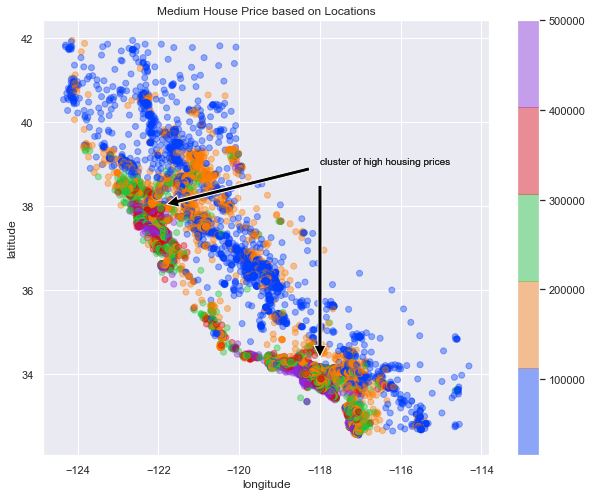

In [15]:
# Location distribution with median housing price and population
# make up my own colormap design
my_cmap = my_cmap = ListedColormap(sns.color_palette("bright",5))
# Set the style as dark grid
sns.set_style("darkgrid")

plt.figure(figsize=(10,8))
plt.scatter(x=df_housing['longitude'], y=df_housing['latitude'], alpha=0.4, c=df_housing['median_house_value'],           cmap=my_cmap)
plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Medium House Price based on Locations")
plt.annotate('cluster of high housing prices', xy=(-122,38), xytext=(-118,39),
              arrowprops=dict(facecolor='black',shrink=0.05))
plt.annotate('cluster of high housing prices', xy=(-118,34), xytext=(-118,39),
              arrowprops=dict(facecolor='black',shrink=0.08))

If we are familiar with California coutours, the graph above exactly reflects it's shape with population density colored out by the color bar.<br>

#### House Price and Location
We can see that there are about two clusters of areas that have comparatively high housing price. Now we can say that the house price is at least a little bit related to the locations, and probably also the proximity to the ocean.<br>

Next step, let's incorporate the population to the graph, and display on a real California map:

In [16]:
# inpect the range of latitude & longitude to accurately display the map image
# min max of longitude & latitude
min_long, max_long = df_housing['longitude'].min(), df_housing['longitude'].max()
min_lat, max_lat = df_housing['latitude'].min(), df_housing['latitude'].max()

print('Range of longitude: {} ~ {}'.format(min_long, max_long))
print('Range of latitude: {} ~ {}'.format(min_lat, max_lat))

Range of longitude: -124.35 ~ -114.31
Range of latitude: 32.54 ~ 41.95


<Figure size 720x576 with 0 Axes>

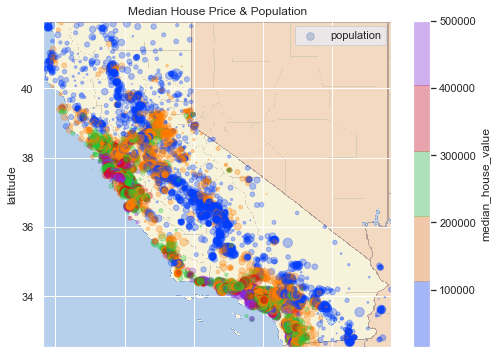

In [17]:
sns.set_style("darkgrid")
ca_map = img.imread('./input/california_map.png')
fig = plt.figure(figsize=(10,8));
# plot the graph that more refects the population
p=df_housing.plot.scatter(x='longitude', y='latitude', alpha=0.3, s=df_housing['population']/40,
                label='population', figsize=(8,6), c='median_house_value', cmap=my_cmap, 
                title='Median House Price & Population');
plt.imshow(ca_map, extent = [-124.35, -114.31, 32.54, 41.95], alpha=0.7);


#### Population and House Prices
From the geographical graph above, we further find that fact that locations with high house prices tend to also have big amount of population. This probably also suggests some positive relationship between 'median_house_value' and 'populaiton'.

#### Ocean Proximity and House Price
By inspecting the graph, we see that the housing price is a little bit related to population, and location.

Let's further explore the ocean_proximity element:


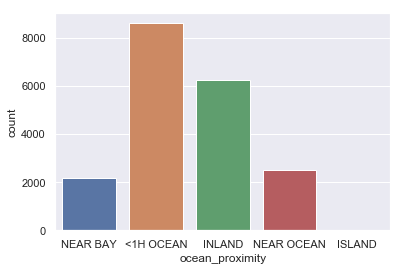

In [18]:
# ocean proximity summarization
sns.countplot(df_housing.ocean_proximity)

Based on the visualization above and our inpection, there's reason for us to beleive that there exists some clusters in terms of the proximity to ocean.

But firstly, we have to encode the categorial data into a manageable type. Normally we apply one-hot encoding to transform categorial data, but here since the number classes is comparatively small, we just encode them into integer values. <br>

For our purpose, we measure the proximity to ocean, so we recognize 'near bay', 'near ocean' and 'island' as all closed to ocean.



In [19]:
# Encode the categorical value ocean_proximity
# For simplicity, we reckon that all 'island','near bay', 'near ocean' as near ocean

prox_encode = {'NEAR BAY':3, 'NEAR OCEAN':3, 'ISLAND':3, '<1H OCEAN':2, 'INLAND':1}
prox_decode = {3:'NEAR OCEAN' ,2:'<1H OCEAN', 1:'INLAND'}

df_housing['ocean_proximity']=df_housing['ocean_proximity'].apply(lambda x:prox_encode[x])


In [20]:
# Now check the ocean_proximity values are correctly encoded
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


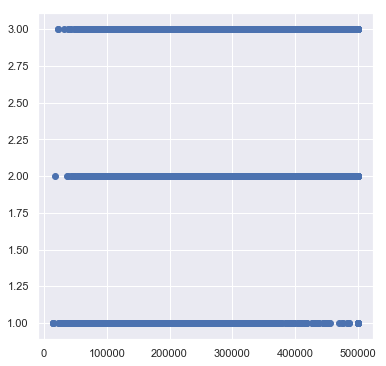

In [21]:
# Let's scatter out ocean_proximity vs. housing price
plt.figure(figsize=(6,6))
plt.scatter(df_housing['median_house_value'],df_housing['ocean_proximity'])

It seems hard to visualize through scatter plots. Instead, we computer the average house value  based on ocean proximity.

average house value for close ocean housing:247174.88424642934
average house value for <1h ocean housing:234404.24660239284
average house value for inland housing:122935.68795007201


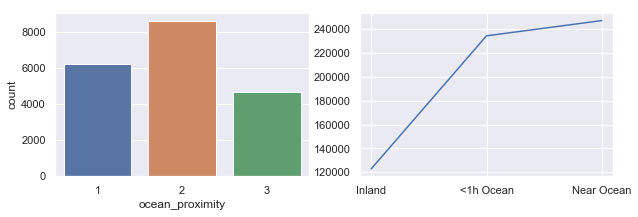

In [22]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot(df_housing.ocean_proximity);
# calculate average median house price based on proximity to ocean
avg1,avg2,avg3=df_housing.groupby(['ocean_proximity']).sum().median_house_value/df_housing.ocean_proximity.value_counts()
print('average house value for close ocean housing:{}'.format(avg3))
print('average house value for <1h ocean housing:{}'.format(avg2))
print('average house value for inland housing:{}'.format(avg1))
plt.subplot(1,2,2);
plt.plot([1,2,3],[avg1,avg2,avg3]);
plt.xticks([1,2,3],['Inland','<1h Ocean','Near Ocean']);

Obviously, better ocean_proximity leads to higher house price. <br> 
This is reasonable, and we definitely want to keep this feature for prediction.

### Households, Total Rooms, Total Bedrooms

Those three variables do have common property that they add the total households, rooms and bedrooms in a district all together. We want to explore if they are effective predictors:

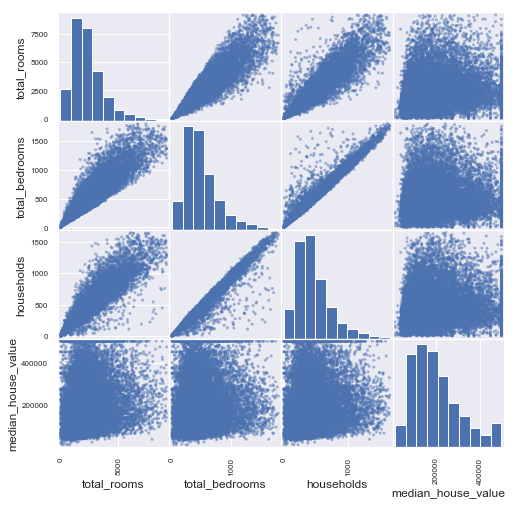

In [23]:
# scatter_matrix
scatter_matrix(df_housing[['total_rooms','total_bedrooms','households','median_house_value']],
               alpha=0.5,figsize=(8,8));

In light of the correlation matrix on the top, it seems that households, total bedrooms and total rooms don't have a clearly linear repashionship with the median hosue value. Also, since the median house value is evaluated within different local districts, it doesn't make sense to add rooms up.

For experiment, we try to ad two properties average 'rooms per household' and 'bedroom per household' at each district in supplement to the original properties.

In [24]:
df_housing['avg_room/household'] = df_housing['total_rooms']/df_housing['households']
df_housing['avg_bedroom/household'] = df_housing['total_bedrooms']/df_housing['households']
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_room/household,avg_bedroom/household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,1.081081


Compute the correlation again between average room/household and median house value

In [25]:
corr_mtx=df_housing.corr()
corr=corr_mtx.median_house_value.sort_values(ascending=False)
print(corr)

median_house_value       1.000000
median_income            0.657102
ocean_proximity          0.438493
total_rooms              0.170497
housing_median_age       0.118150
avg_room/household       0.115403
households               0.094479
total_bedrooms           0.075741
population              -0.034930
avg_bedroom/household   -0.043852
longitude               -0.045238
latitude                -0.146941
Name: median_house_value, dtype: float64


It's seems that average rooms per household are somehow powerful than 'households' alone, but 'avg_bedrooms/household' doesn't really contribute to the median house price. Let's remove the newly added columns 'avg_bedroom/household'.

In [26]:
df_housing.drop('avg_bedroom/household',axis=1,inplace=True)

### Compare Linear Model by R^2
The last step before we move on to predcition part is to set up linear models with various predictors. We will use various amount of predictors ranking from the top correlation with 'median_house_value':

In [27]:
# Do linear regression on dataset and return the R^2 value
def linear_model(X,y):
    reg = LinearRegression().fit(X,y)
    return reg.score(X,y)

In [28]:
# rank all variables by correlation value to 'median_house_value'
all_variables_ordered = ['median_income','ocean_proximity','total_rooms','housing_median_age','avg_room/household',
                        'households','total_bedrooms','population','longitude','latitude']
r_squares = {}
for i in range(len(all_variables_ordered)):
    vars = all_variables_ordered[:i+1]
    X = df_housing[vars]
    y = df_housing.median_house_value
    r_squares[i]=linear_model(X,y)

Text(0, 0.5, 'R squared value')

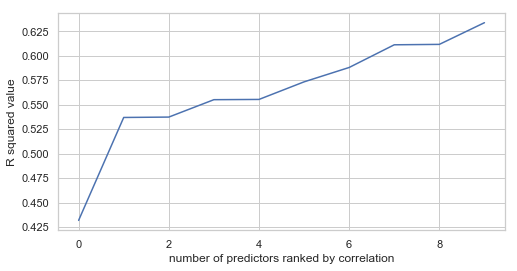

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
plt.plot(r_squares.keys(),r_squares.values())
plt.xlabel('number of predictors ranked by correlation')
plt.ylabel('R squared value')

From the graph above, it seems that as the number of predictors increase, the power of the linear regression model measured by R squared value also increase. Thus we are sure that we can put all variables into the final prediction models without huring the prediction power.



## <font color='red'> TODO: ADD a conclusion to our data analysis part here </font>

Text(0, 0.5, 'median_housing_value')

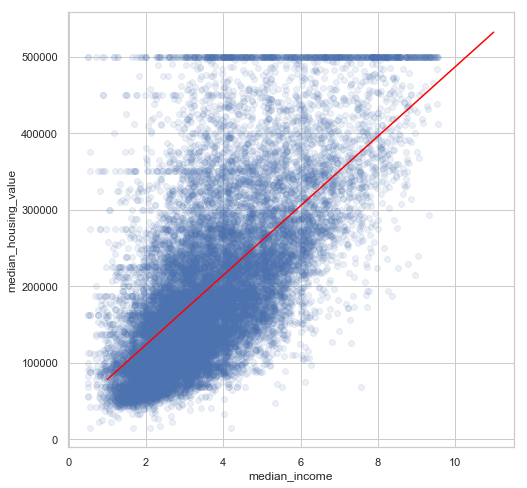

In [30]:
# Probably remove this
# regression on house prive w.r.t median_income
plt.figure(figsize=(8,8))
plt.scatter(df_housing['median_income'],df_housing['median_house_value'],alpha=0.1)
a,b = np.polyfit(df_housing['median_income'],df_housing['median_house_value'],1)
x = np.arange(1,13,2)
y = x*a + b
plt.plot(x,y,color='red')
plt.xlabel('median_income')
plt.ylabel('median_housing_value')

# Prediction

In this section, we are going to run four different regression models on the two vriables that we recognized most powerful influences on the median house prices, as mentioned in the background section of our project.

In [31]:
# Function that used to plot the learning loss both on training set and validation set
# step: the jump between number of samples to calc the loss; default 1
def plot_learning_curve(model, X_train, X_test, y_train, y_test,step=100):
    train_loss=[]
    val_loss=[]
    for i in range(1, len(X_train),step):
        model.fit(X_train[:i],y_train[:i])
        y_pred = model.predict(X_train[:i])
        y_pred_val = model.predict(X_test)
        train_loss.append(mean_squared_error(y_train[:i],y_pred))
        val_loss.append(mean_squared_error(y_test,y_pred_val))
    plt.figure(figsize=(8,6))
    plt.plot(np.sqrt(train_loss),'r-',linewidth=2,label='train')
    plt.plot(np.sqrt(val_loss),'b-',label='test')
    plt.xlabel('iterations (hundred)')
    plt.ylabel('SMSE loss')
    plt.legend()
    return model.predict(X_test)

### 1. Median Income 

In [32]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_room/household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853


#### a. Linear Regression

In [33]:
X = df_housing['median']

KeyError: 'median'

### Deimensinoality Reduction with PCA

We see that our final dataset invovles in total 10 dimensions. In this section we want to explore weather we can apply the dimensionality reducion technique on our dataset while maintaining the most features and help visualize.

Principle Component Analysis(PCA) is by far the most popular demensionality reduction algorithm. It identifies the axis that accounts for the largest amount of variance, by finding the principle components fo the dataset through matrix decomposition.

In [ ]:
data = df_housing.drop('median_house_value',axis=1).values
labels = df_housing.median_house_value.values
#features, labels = train_test_split(,test_size=0.2)

PCA assumes that the data is centered and distributed around the origin. <br>
For this reason we first do a standardization to our data with the help of sklearn library:

In [ ]:
# Normalization
scalar = preprocessing.StandardScaler().fit(data)
data = scalar.transform(data)


In [ ]:
data.shape

Let's first explore the best dimensionality that will catch the most features of our dataset:

In [ ]:
# PCA to find contributiong of each dimension
pca= PCA(n_components=10) 
pca.fit(data);
reduced_data = pca.transform(data)
reduced_data.shape

In [ ]:
# Plot the explained variance curve
with plt.style.context('ggplot'):
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Dimensions')
    plt.ylabel('explained variance');
    plt.subplot(1,2,2)
    plt.bar(x=range(10),height=pca.explained_variance_ratio_)
    plt.xlabel('Variance contributed by each estra dimension decreasing')
    plt.ylabel('variance explained')

We can see that 8 components pretty much accounts for most feautures of the data. Let's reduce our training dataset to 8 dimensions for prediction.

In [ ]:
# PCA that reduces the dataset to 8 dimenions
pca1= PCA(n_components=8) 
pca1.fit(data);
reduced_data = pca1.transform(data)
reduced_data.shape

### Regression Methods

In [ ]:
# This should be put on top finally
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# seperate the training, test set
X = reduced_data
y = df_housing.median_house_value.values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# #
# def plot_training_validation_curve(model, X_train, X_test, y_train, y_test,step=100):
#     valid_loss = []
#     train_loss = []
#     for i in range(1, len(X_train),step):
#         model.fit(X_train[:i], y_train[:i])
#         y_pred_dtr = model.predict(X_test)
#         training_loss = np.sqrt(mean_squared_error(y_train[:i],model.predict(X_train[:i])))
#         val_loss = np.sqrt(mean_squared_error(y_test,y_pred_dtr))
#         valid_loss.append(val_loss)
#         train_loss.append(training_loss)
#     plt.figure(figsize=(8,5))
#     plt.plot(range(1,50),train_loss,'b',label='training')
#     # Plot validation loss with BDT depth
#     plt.plot(range(1,50),valid_loss,'r',label='validation')
#     plt.ylabel('MSE Loss')
#     plt.xlabel('Max Depth')
#     plt.legend()

#### Linear Regression

In [ ]:
linreg = LinearRegression()
y_pred_lin=plot_learning_curve(linreg, X_train, X_test, y_train, y_test,100)

In [ ]:
print('the mse loss for Linear Regression is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lin))))

#### Polynomial Regression

In [ ]:
#try polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

In [ ]:
y_pred_poly=plot_learning_curve(linreg, X_poly_train, X_poly_test, y_train, y_test,100)


See how our prediction with polynomial regression works on the first 100 test samples:

In [ ]:
plt.plot(y_pred_poly[:100],label='prediction')
plt.plot(y_test[:100],label='label')
plt.legend()
print('the mse loss for Polynomial Regression is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_poly))))

It turns out that our prediction to a large extent reflects the approximate range of the actual house price.

In [ ]:
#plot_training_validation_curve(linreg, X_poly_train, X_poly_test, y_train, y_test,step=100)

### Decision Tree Regressor

In [ ]:
#move this to the top later
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


Let's plot and find what's the best maximum tree depth of the model for our dataset

In [ ]:
valid_loss = []
train_loss = []

In [ ]:
for i in range(1,50):
    
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(X_train, y_train)
    y_pred_dtr = regressor.predict(X_test)
    training_loss = np.sqrt(mean_squared_error(y_train,regressor.predict(X_train)))
    val_loss = np.sqrt(mean_squared_error(y_test,y_pred_dtr))
    valid_loss.append(val_loss)
    train_loss.append(training_loss)

In [ ]:
with plt.style.context('ggplot'):
    # Plot training loss with BDT depth
    plt.figure(figsize=(8,5))
    plt.plot(range(1,50),train_loss,'b',label='training')
    # Plot validation loss with BDT depth
    plt.plot(range(1,50),valid_loss,'r',label='validation')
    plt.ylabel('MSE Loss')
    plt.xlabel('Max Depth')
    plt.legend()

From the training curve & validation curve above, the validation loss is lowest when the max depth is around 8.

In [ ]:
regressor = DecisionTreeRegressor(max_depth=8)
regressor.fit(X_train, y_train)
y_pred_dtr = regressor.predict(X_test)

In [ ]:
plt.plot(y_pred_dtr[:100],label='prediction')
plt.plot(y_test[:100],label='label')
plt.legend()
print('the mse loss for Decision Tree Regressor is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_dtr))))

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [ ]:
regr = ElasticNet()

In [ ]:
regr.fit(X_train, y_train)

In [ ]:
y_pred_lin=plot_learning_curve(regr, X_train, X_test, y_train, y_test,100)

In [ ]:
y_pred_en = regr.predict(X_test)

In [ ]:
plt.plot(y_pred_en[:100],label='prediction')
plt.plot(y_test[:100],label='label')
plt.legend()
print('the mse loss for Polynomial Regression is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_en))))

# Ethics & Privacy

The dataset we have chosen is publicly available to us. Hence, there has not been a need to request permission for access to the data. The website we have taken the data from, namely Kaggle, is a website that focuses on data privacy. In order to download datasets, we sign agreements on various aspects of data privacy. It is made clear to us that the data is anonymized and/or based on a random sampling of the population. Also, this dataset has been derived from a paper named “Sparse Spatial Autoregressions” by Pace Kelley and Ronand Barry, and hence the issue of informed consent is taken care of since the authors of the paper have already received the informed consent required to create the original dataset.

Moreover, all the data samples are anonymous and do not involve any sensitive information that might cause trouble to the providers of those data. We analyze the data only for study reasons and for this course project. The data we have downloaded from Kaggle will not used by this group for any financial gains or business purposes. If it is the case that data is not anonymized for any individual, there is a possibility to remove that individual from the dataset through Python Pandas tools. Once the row is deleted, records for that particular individual would be removed as well, which conforms to the “Right to be forgotten”.
A data retention plan would  not be required in this case, as it has already been published in the “Statistics and Probability Letters journal”. Hence, if the data is no longer needed, the journal would still exist, and there would be no need to delete the data. 

There exist potential biases in the observations put forth in the dataset. Potential biases may include families who come from wealthy areas in California such as many places in the Silicon Valley or well off areas in the Los Angeles/San Diego counties. These families that come from these areas may be used to abnormally high house/apartment prices due to potential safety/better quality of life from living in these communities. Schools also play a large part of housing prices since areas with renowned schools generally boast much higher house prices compared to other places that might give out more land for less of a price. However, there might be a risk of missing out on residents since the collection of data is done on a block group basis. The definition of a block group is given in the “Data” section of the proposal. 



# Conclusion & Discussion

*Fill in your discussion information here*